# Regresión Lineal, Ridge, Lasso y Decision Trees

## WorkShop #2

Dataset source: [Kaggle](https://www.kaggle.com/)

*   [housing prices](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso #RidgeCV (validación cruzada)
from sklearn.preprocessing import StandardScaler

### Lectura de Datos

In [186]:
# Loading the Dataset
import pandas as pd
import numpy as np

house = pd.read_csv("C:/Users/kathy/Desktop/ml/week2/practicelinealmodel/Housing.csv", sep=',') #Lectura de data
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


A continuación, presentamos la descripción general del conjunto de datos `Housing Prices Dataset`. 

In [187]:
print("Tipo de datos:")
house.info()

Tipo de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Modelo de Regresión Lineal 

Se puede observar cómo dentro del dataset hay una variedad en la naturaleza de las variables. El target en este caso es la variable **price**, la cual cuenta con variables explicativas tanto númericas como categóricas. Para el caso de modelos lineales es importante trabajar solo con variables númericas, que además deben ser continuas (no se incluyen variables de conteo).

Por lo tanto, para este caso solo se tomará como variable explicativa a la variable **area**, la cual es la única continua dentro del dataframe.

In [188]:
import numpy as np
from sklearn.model_selection import train_test_split

#separacion de la base de datos en variables y target
house = house.select_dtypes(exclude = 'object')
house_x = house['area']
house_y = house['price']

#creacion de test y training para ambas separaciones
house_x_train, house_x_test, house_y_train, house_y_test = train_test_split(house_x, house_y, test_size= 0.33, random_state= 101)

A continuación, se realiza el modelo lineal simple, obteniendo coeficientes, métrica $R^2$ y un plot que represente el comportamiento de los datos junto al modelo.

Coefficients: 
 [479.10895333]
Mean squared error: 2429046562551.89
Coefficient of determination: 0.25


([], [])

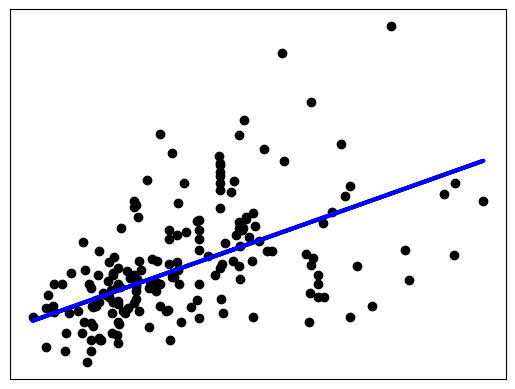

In [189]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#crear modelo lineal
regresion = linear_model.LinearRegression()
regresion.fit(np.array(house_x_train).reshape(-1, 1), house_y_train)

#prediccion
house_y_pred = regresion.predict(np.array(house_x_test).reshape(-1, 1))

# The coefficients
print("Coefficients: \n", regresion.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(house_y_test, house_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(house_y_test, house_y_pred))

# Plot outputs
plt.scatter(house_x_test, house_y_test, color="black")
plt.plot(house_x_test, house_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

Las métricas muestran la mala calidad del modelo al solo recoger un 25% de la variabilidad, además de contar con un valor gigantezco para el MSE. Visualmente también se puede notar cómo la dispersión de los datos va aumentando a medida que se aumenta la variable **area**, dando indicios de heterocedasticidad.

### Modelo de Regresión Ridge

La regresión Ridge `regulariza` la regresión lineal imponiendo una `penalización` al tamaño de los `coeficientes`. La regularización consiste en restringir explícitamente un modelo para evitar el `sobre ajuste` del éste. 

A continuación se realiza una exploración de la relación entre las variables del dataset, nuevamente teniendo en cuenta únicamente las variables númericas.

<Axes: >

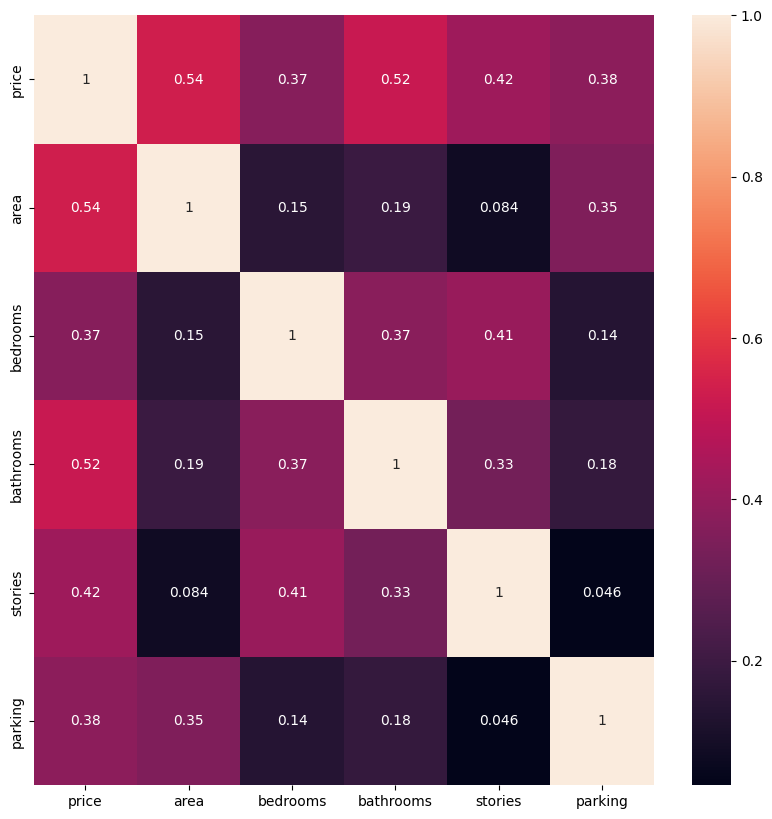

In [190]:
datos_rr = df_price.copy()
datos_rr = datos_rr.drop(columns=['guestroom', 'mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus'])# Eliminar la columnas categóricas
#Mapa de calor
plt.figure(figsize = (10, 10))
sns.heatmap(datos_rr.corr(), annot = True)

A continuación se ajusta el modelo de Regresión de Ridge a los datos de entrenamiento y se estima el score de los datos de test y train.

In [191]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(np.array(house_x_train).reshape(-1,1),house_y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(np.array(house_x_train).reshape(-1,1), house_y_train)
test_score_ridge = ridgeReg.score(np.array(house_x_test).reshape(-1,1), house_y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.30269463076314285
The test score for ridge model is 0.2458385301467878


### Modelo de Regresión Lasso

In [192]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(np.array(house_x_train).reshape(-1,1),house_y_train)
train_score_ls =lasso.score(np.array(house_x_train).reshape(-1,1),house_y_train)
test_score_ls =lasso.score(np.array(house_x_test).reshape(-1,1),house_y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.30269463076314274
The test score for ls model is 0.24583853004780432


### Modelo predictivo usando Decision Trees

Dataset source: [Kaggle](https://www.kaggle.com/)

*   [dataset mobile](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

#### Lectura de Datos

A continuación, presentamos la descripción general del conjunto de datos `Mobile Price Classification`. La variable objetivo es `price_range`, solo se tiene en cuenta la data del archivo train.cvs, la cual dividimos en datos de entrenamiento y prueba. 

In [193]:
df_dtree = pd.read_csv("C:/Users/kathy/Desktop/ml/week2/practicelinealmodel/mobile_price_train.csv", sep=',') #Lectura de datos de entrenamiento
#df_tree = df.drop(columns=["IND", "IND.1", "IND.2"])
df_dtree.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [194]:
print("Tipo de datos:")
df_dtree.info()

Tipo de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64 

Dado lo anterior, observamos que nuestro conjunto de datos consta de `21` variables (columnas) que tienen tipos de datos `float64` e `int64`. El tipo de dato `float64`  incluye valores numéricos con decimales, mientras que el tipo `int64`incluye valores númericos enteros. En total, tenemos 2000 registros en nuestro conjunto de datos. 

#### Exploración Inicial de los datos

##### Tratamiento de los datos

A continuación se divide la data en datos de train y test. 

In [195]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


#Definición de variables
datos_dtree = df_dtree.copy()
y_tree = datos_dtree['price_range'] # Extraer la variable dependiente (variable objetivo)
x_tree = datos_dtree.drop(columns=['price_range'])# Eliminar la columnas del DataFrame

#splot
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(x_train_tree.shape))
print("The dimension of X_test is {}".format(x_test_tree.shape))

The dimension of X_train is (1400, 20)
The dimension of X_test is (600, 20)


##### Construcción del modelo inicial

A continuación se usa el módulo `tree` a tráves de la función `DecisionTreeClassifier` de la libreria `sklearn`. 

El siguiente fragmento de código crea un modelo de clasificación basado en árboles de decisión, usando como criterio de medición de calidad la `entropía`. La entropía es una medida de impureza de un conjunto de datos y se utiliza para encontrar la mejor división en cada nodo del árbol. Al ejecutrar el código, el clasificador de decision tree aprenderá las reglas de desición a partir de los datos de entrenamiento, las cuales serán almacenadas en  dicho árbol, permitiendo que el modelo clasifique nuevos datos basados en dichas reglas. 

In [196]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

decisiontree = DecisionTreeClassifier(criterion='entropy' ) #entropy
decisiontree.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(criterion='entropy')

En el siguiente gráfico se observa el árbol de desición producto de los datos de entrenamiento. 

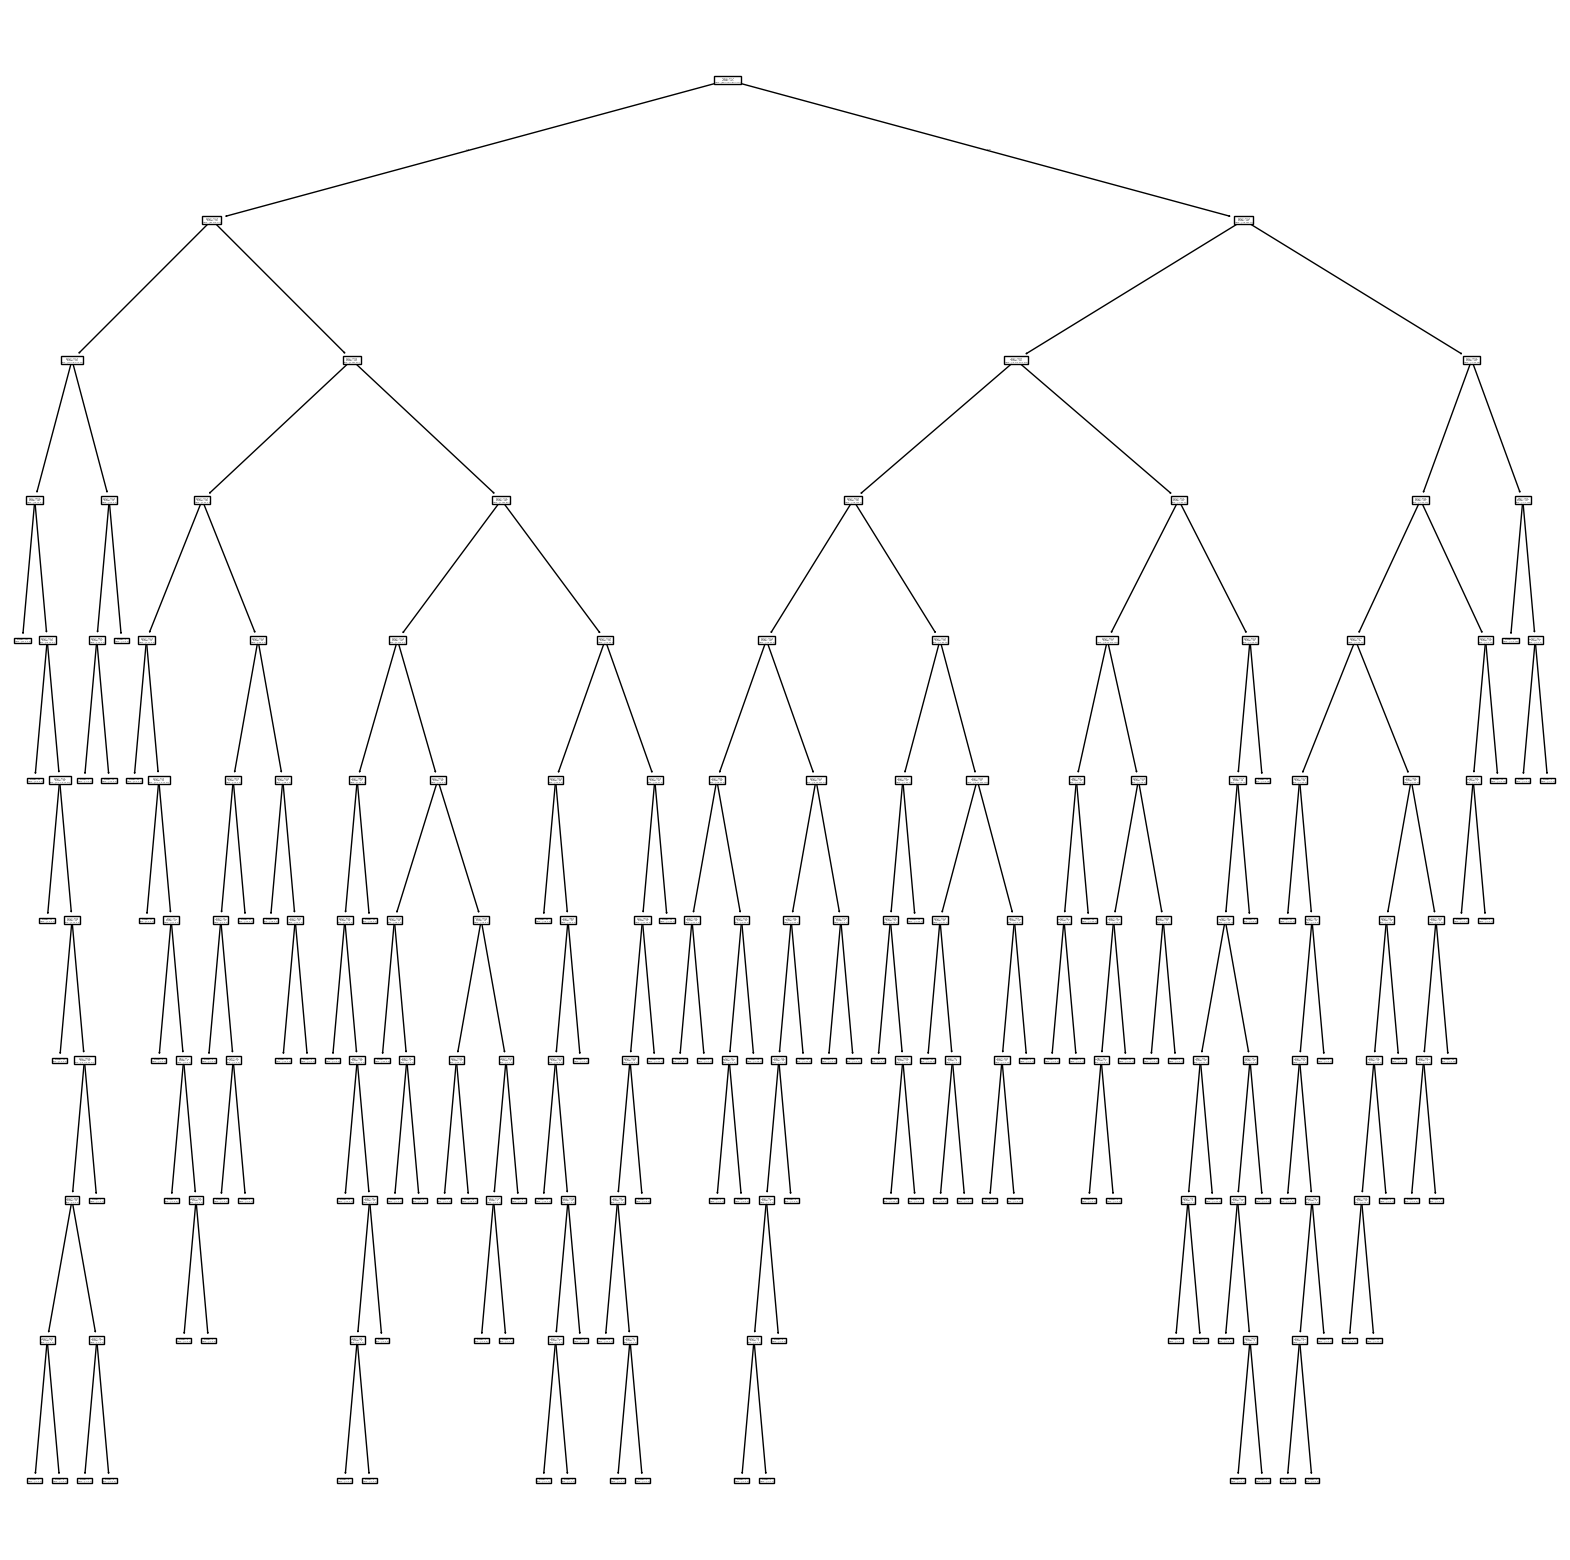

In [197]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(decisiontree)
plt.show()

##### Evaluación del Modelo Inicial

A continuación evaluamos la presición de predicción de nuestro modelo.

In [322]:
# score: accuracy
decisiontree.score(x_train_tree,y_train_tree)

1.0

El modelo ha aprendido perfectamente las características del conjunto de entrenamiento y ha clasificado correctamente todas las muestras. Esto puede ser un indicador de un modelo que se ha ajustado demasiado bien a los datos de entrenamiento, conocido como sobreajuste (overfitting).

A continuación se visualizan las variables predictoras (características) de nuestro dataset. 

In [345]:
df_new = df_dtree.drop(['price_range'],axis=1)
df_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


En el siguiente gráfico se visualiza la importancia de cada una de nuestras variables predictoras (características).

<BarContainer object of 20 artists>

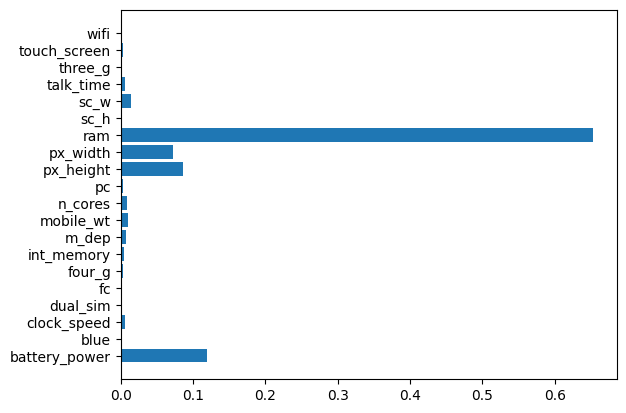

In [346]:
decisiontree.feature_importances_
plt.barh(df_new.columns,decisiontree.feature_importances_)

Con base en la importancia de las variables, solo se tendran en cuenta las variables relacionadas a continuación:  `columns_to_keep`.

In [347]:
imp = pd.DataFrame({
    'Features': decisiontree.feature_names_in_,
    'Importance': decisiontree.feature_importances_
})

alpha = 0.05
imp_filter = imp[imp['Importance'] >= alpha]
imp_filter

columns_to_keep = imp_filter['Features']

df_dtree_x = df_dtree.copy()
x_new = df_dtree_[columns_to_keep.values]


print(columns_to_keep)

0     battery_power
11        px_height
12         px_width
13              ram
Name: Features, dtype: object


#### Modelo de Árbol de Desición (Decision Tress)

A continuación se procede a la construcción de nuestro nuevo modelo con las carácteristicas (`battery_power`, `px_height`, `px_width`, `ram` ) y variable objeto (`price_range`) ya definidas.

In [349]:
#Definición de variables
y_tree = datos_dtree['price_range'] # Extraer la variable dependiente (variable objetivo)

#splot
x_train_tree_new, x_test_tree_new, y_train_tree_new, y_test_tree_new = train_test_split(x_new, y_tree, test_size=0.3, random_state=17)

print("The dimension of X_train_new is {}".format(x_train_tree_new.shape))
print("The dimension of X_test_new is {}".format(x_test_tree_new.shape))

The dimension of X_train_new is (1400, 4)
The dimension of X_test_new is (600, 4)


In [350]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

decisiontree_new = DecisionTreeClassifier(criterion='entropy' ) #entropy
decisiontree_new.fit(x_train_tree_new, y_train_tree_new)

DecisionTreeClassifier(criterion='entropy')

En el siguiente gráfico se observa el árbol de desición producto de los datos de entrenamiento. 

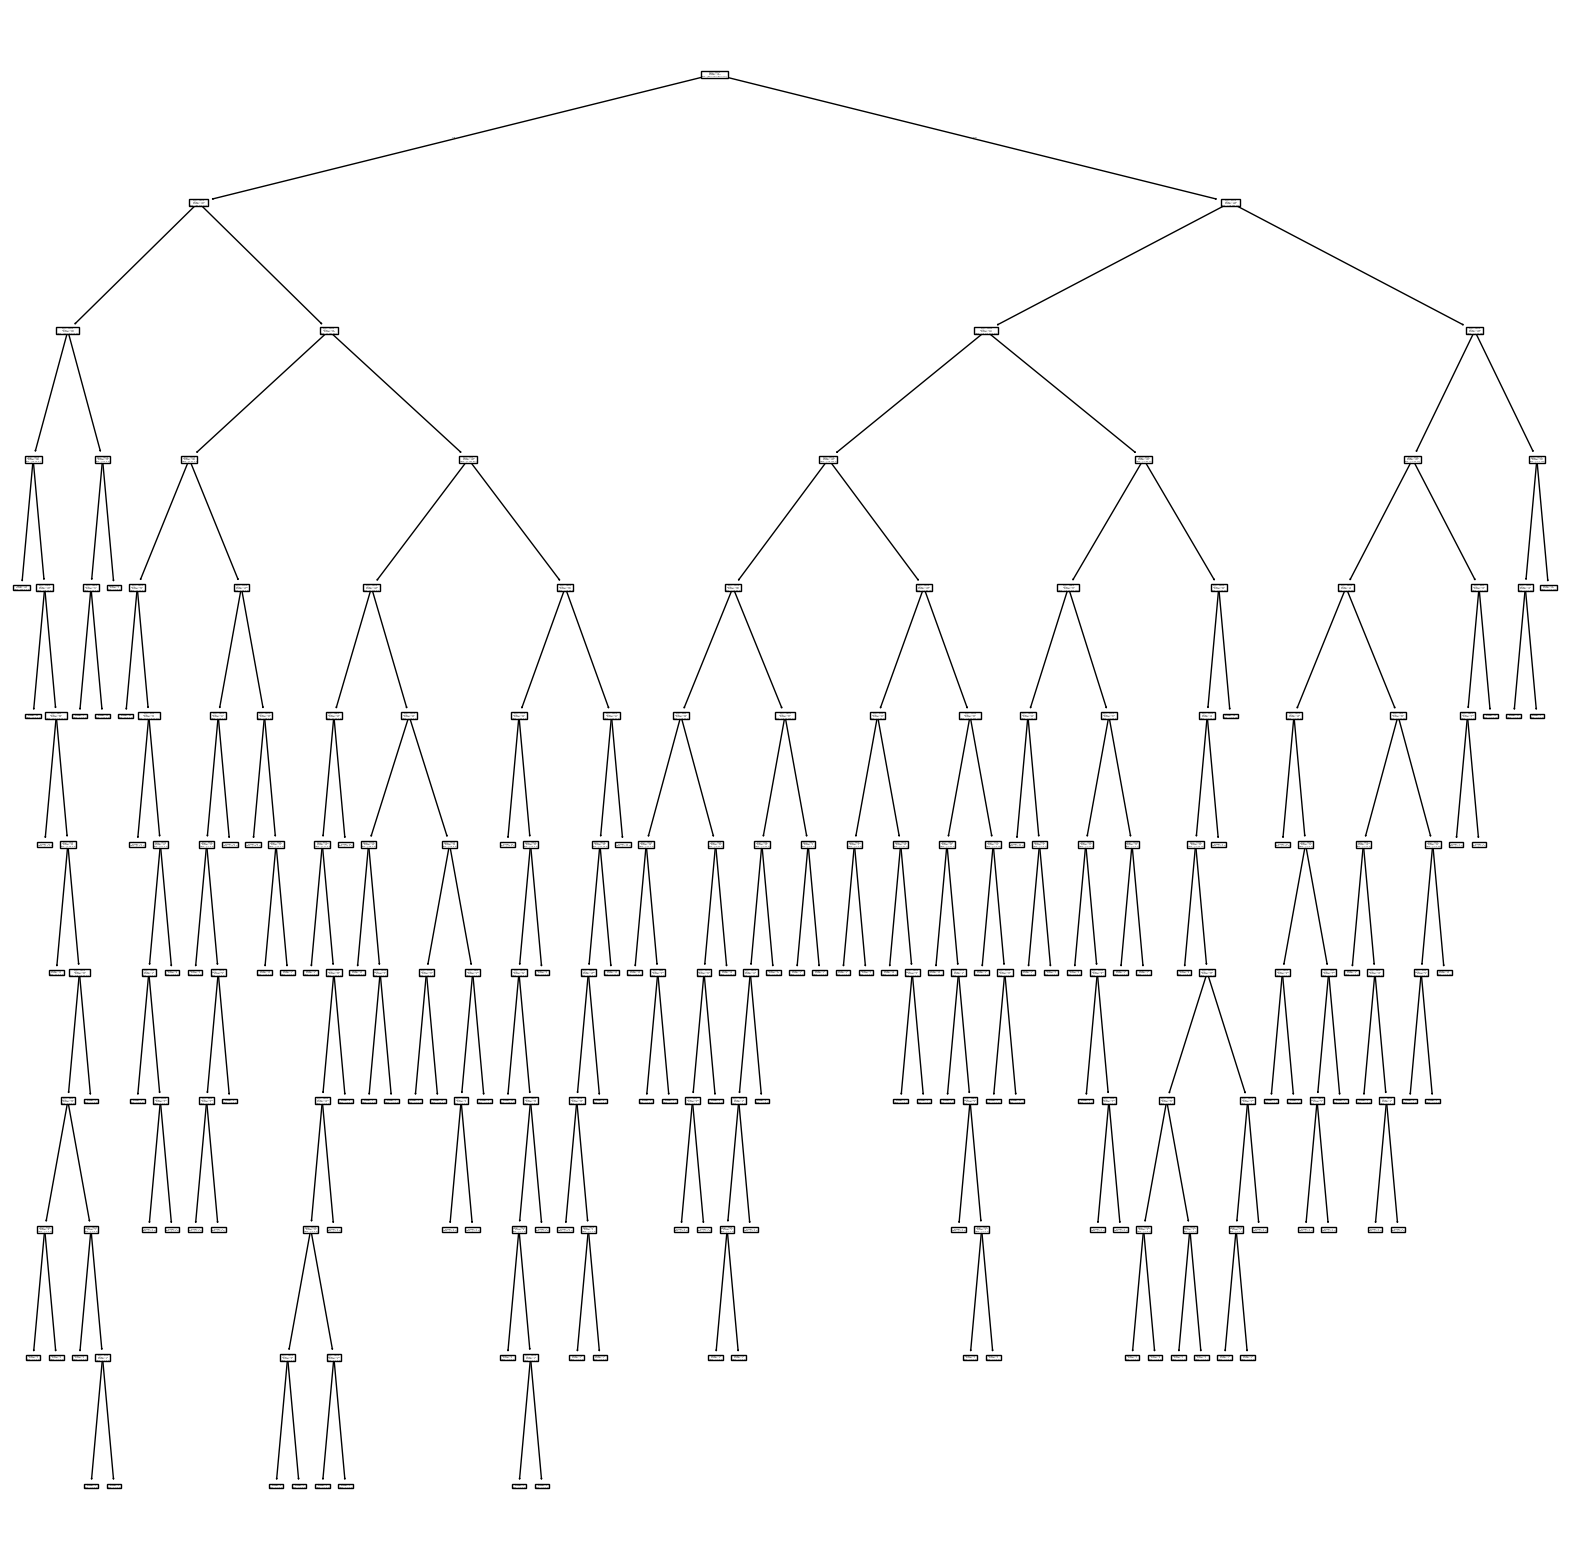

In [351]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(decisiontree_new)
plt.show()

In [352]:
print(f'Profundidad {decisiontree_new.tree_.max_depth}')
print(f'Número de Nodos {decisiontree_new.tree_.node_count}')

Profundidad 11
Número de Nodos 241


A continuación se realiza la predicción de `las etiquetas de entrenamiento` y `las etiquetas de prueba`, utilizando un modelo de árbol de decisión `decisiontree_new` previamente entrenado. 

In [353]:
y_train_pred_new = decisiontree_new.predict(x_train_tree_new)
y_train_pred_new

array([2, 2, 3, ..., 2, 3, 2], dtype=int64)

In [354]:
y_test_pred_new = decisiontree_new.predict(x_test_tree_new)
y_test_pred_new

array([3, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 3, 0, 2, 0, 1,
       3, 0, 0, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 2, 3, 3, 0, 0, 1, 2, 1, 0,
       0, 1, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 0, 3, 3, 0,
       3, 3, 1, 1, 3, 2, 1, 0, 1, 3, 0, 3, 0, 3, 2, 3, 0, 0, 1, 0, 1, 2,
       3, 2, 1, 3, 3, 2, 2, 0, 0, 2, 3, 2, 3, 0, 0, 3, 2, 3, 0, 0, 2, 1,
       1, 3, 3, 1, 2, 3, 2, 0, 0, 0, 2, 3, 1, 0, 1, 3, 1, 0, 2, 2, 0, 3,
       2, 3, 1, 0, 3, 3, 3, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 3, 2, 3, 3,
       1, 0, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 0, 1, 2, 1, 2, 3, 2, 2, 1, 1,
       1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 1, 0, 3, 1, 0, 0, 2, 1,
       2, 1, 0, 3, 0, 0, 2, 1, 0, 2, 2, 0, 1, 3, 0, 0, 2, 2, 1, 1, 2, 1,
       2, 3, 1, 1, 2, 2, 1, 2, 0, 1, 3, 0, 0, 2, 0, 2, 3, 3, 1, 1, 2, 1,
       0, 0, 2, 2, 3, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 3, 1, 2, 3, 3, 3,
       3, 1, 1, 3, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 3, 0, 3, 0, 2, 1, 1, 3,
       1, 2, 3, 3, 3, 0, 0, 1, 2, 3, 2, 0, 1, 0, 2,

Función para generar `Mátriz de confusión`

In [355]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusionmatrix(y_pred,y_train):
    print('Confusion matrix')
    cf = confusion_matrix(y_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

* Mátriz de confusión de etiquetas de entramiento predichas. 

Train score 1.0
Confusion matrix


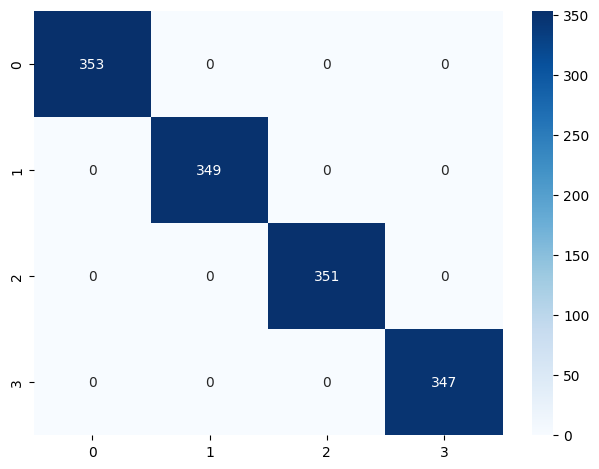

In [356]:
print(f'Train score {accuracy_score(y_train_pred_new,y_train_tree_new)}')
plot_confusionmatrix(y_train_pred_new,y_train_tree_new)

El modelo clasificó correctamente todas las observaciones en sus respectivas clases. Aunque el rendimiento en el conjunto de entrenamiento es perfecto, es importante tener precaución, ya que esto podría indicar que el modelo está sobreajustado a los datos de entrenamiento. Esto significa que el modelo podría no generalizar bien a nuevos datos no vistos, como los del conjunto de prueba.

* Mátriz de confusión de etiquetas de prueba. 

Test score 0.86
Confusion matrix


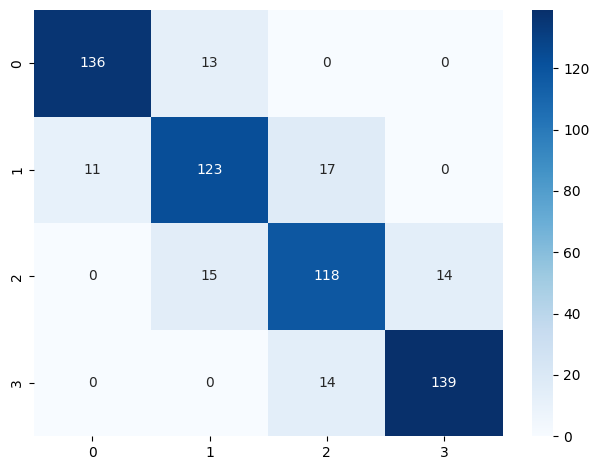

In [357]:
print(f'Test score {accuracy_score(y_test_pred_new,y_test_tree_new)}')
plot_confusionmatrix(y_test_pred_new,y_test_tree_new)

El modelo clasifico las observaciones como se describe a continuación: 

* Clase 0:
    * 136 observaciones pertenecientes a la clase 0 fueron correctamente clasificadas como tal.
    * 13 observaciones de la clase 0 fueron incorrectamente clasificadas como clase 1.

* Clase 1:
    * 123 observaciones de la clase 1 fueron correctamente clasificadas como tal.
    * 11 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 0.
    * 17 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 2.

* Clase 2:
    * 118 observaciones de la clase 2 fueron correctamente clasificadas como tal.
    * 15 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 1.
    * 14 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 3.

* Clase 3:
    * 139 observaciones pertenecientes a la clase 3 fueron correctamente clasificadas como tal.
    * 14 observaciones de la clase 3 fueron incorrectamente clasificadas como clase 2.

#### Técnicas de Prunning

**Pre - pruning**

El siguiente código está utilizando una técnica de pre-poda (pre-pruning) para ajustar los hiperparámetros del modelo de árbol de decisión antes de que el árbol sea completamente entrenado. Lo anterior, con el objetivo de evitar el sobreajuste (overfitting) del modelo, permitiendo que el árbol sea más generalizable a nuevos datos.

La función `GridSearchCV` realiza una búsqueda exhaustiva sobre el espacio de hiperparámetros definidos en `params` para encontrar la combinación que mejor optimiza el rendimiento del modelo basado en la validación cruzada (permite que todos los datos se utilicen tanto para el entrenamiento como para la evaluación, pero en diferentes momentos y configuraciones).

In [358]:
# Pre pruning techniques
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {'max_depth': [2,4,6,8,9],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,4]}

gcv = GridSearchCV(estimator=decisiontree_new,param_grid=params)
gcv.fit(x_train_tree_new,y_train_tree_new)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 4, 6, 8, 9],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 3, 4]})

El siguiente código selecciona el mejor modelo basado en la validación cruzada, lo entrena en el conjunto completo de datos de entrenamiento, hace predicciones tanto en los datos de entrenamiento como en los de prueba, y luego evalúa su rendimiento en el conjunto de entrenamiento utilizando una matriz de confusión.

In [359]:
model_pre_p = gcv.best_estimator_ #Selecciona el modelo con la mejor combinación de hiperparámetros encontrada por GridSearchCV. Modelo que muestra el mejor rendimiento durante la validación cruzada.
model_pre_p.fit(x_train_tree_new,y_train_tree_new) #Entrena el modelo seleccionado (con los mejores hiperparámetros)
y_train_pred_pp = model_pre_p.predict(x_train_tree_new) # Realiza predicciones de las etiquetas de entrenamiento utilizando el modelo entrenado
y_test_pred_pp = model_pre_p.predict(x_test_tree_new) # Realiza predicciones de las etiquetas en el conjunto de prueba (que no fue utilizado en el entrenamiento)

Train score 0.9892857142857143
Confusion matrix


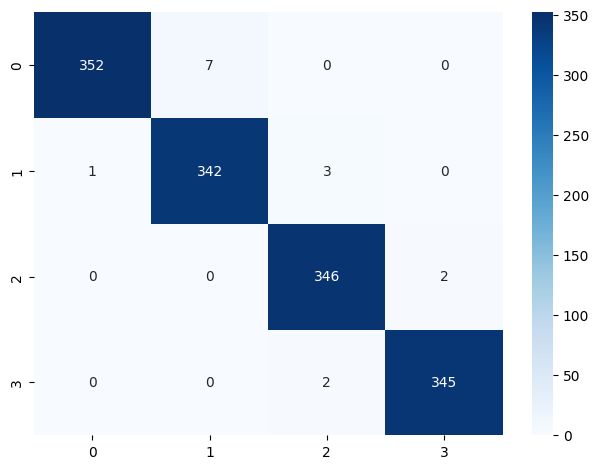

In [360]:
print(f'Train score {accuracy_score(y_train_pred_pp,y_train_tree)}')
plot_confusionmatrix(y_train_pred_pp,y_train_tree_new)

El modelo clasifico las observaciones como se describe a continuación: 

* Clase 0:
    * 352 observaciones pertenecientes a la clase 0 fueron correctamente clasificadas como tal.
    * 7 observaciones de la clase 0 fueron incorrectamente clasificadas como clase 1.

* Clase 1:
    * 342 observaciones de la clase 1 fueron correctamente clasificadas como tal.
    * 1 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 0.
    * 3 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 2.

* Clase 2:
    * 346 observaciones de la clase 2 fueron correctamente clasificadas como tal.
    * 0 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 1.
    * 2 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 3.

* Clase 3:
    * 345 observaciones pertenecientes a la clase 3 fueron correctamente clasificadas como tal.
    * 2 observaciones de la clase 3 fueron incorrectamente clasificadas como clase 2.

Test score 0.855
Confusion matrix


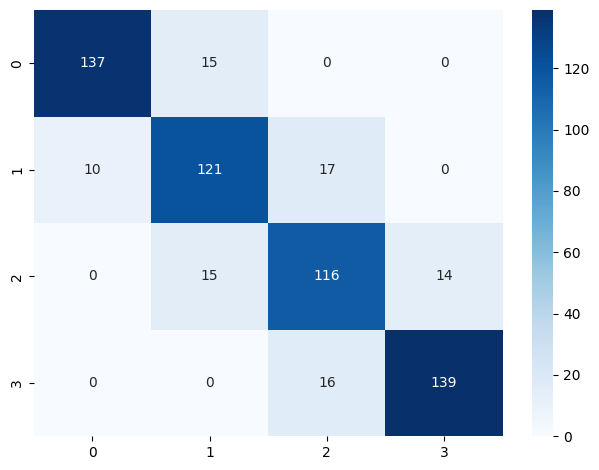

In [361]:
print(f'Test score {accuracy_score(y_test_pred_pp,y_test_tree)}')
plot_confusionmatrix(y_test_pred_pp,y_test_tree_new)

El modelo clasifico las observaciones como se describe a continuación: 

* Clase 0:
    * 137 observaciones pertenecientes a la clase 0 fueron correctamente clasificadas como tal.
    * 15 observaciones de la clase 0 fueron incorrectamente clasificadas como clase 1.

* Clase 1:
    * 121 observaciones de la clase 1 fueron correctamente clasificadas como tal.
    * 10 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 0.
    * 17 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 2.

* Clase 2:
    * 116 observaciones de la clase 2 fueron correctamente clasificadas como tal.
    * 15 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 1.
    * 14 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 3.

* Clase 3:
    * 139 observaciones pertenecientes a la clase 3 fueron correctamente clasificadas como tal.
    * 16 observaciones de la clase 3 fueron incorrectamente clasificadas como clase 2.

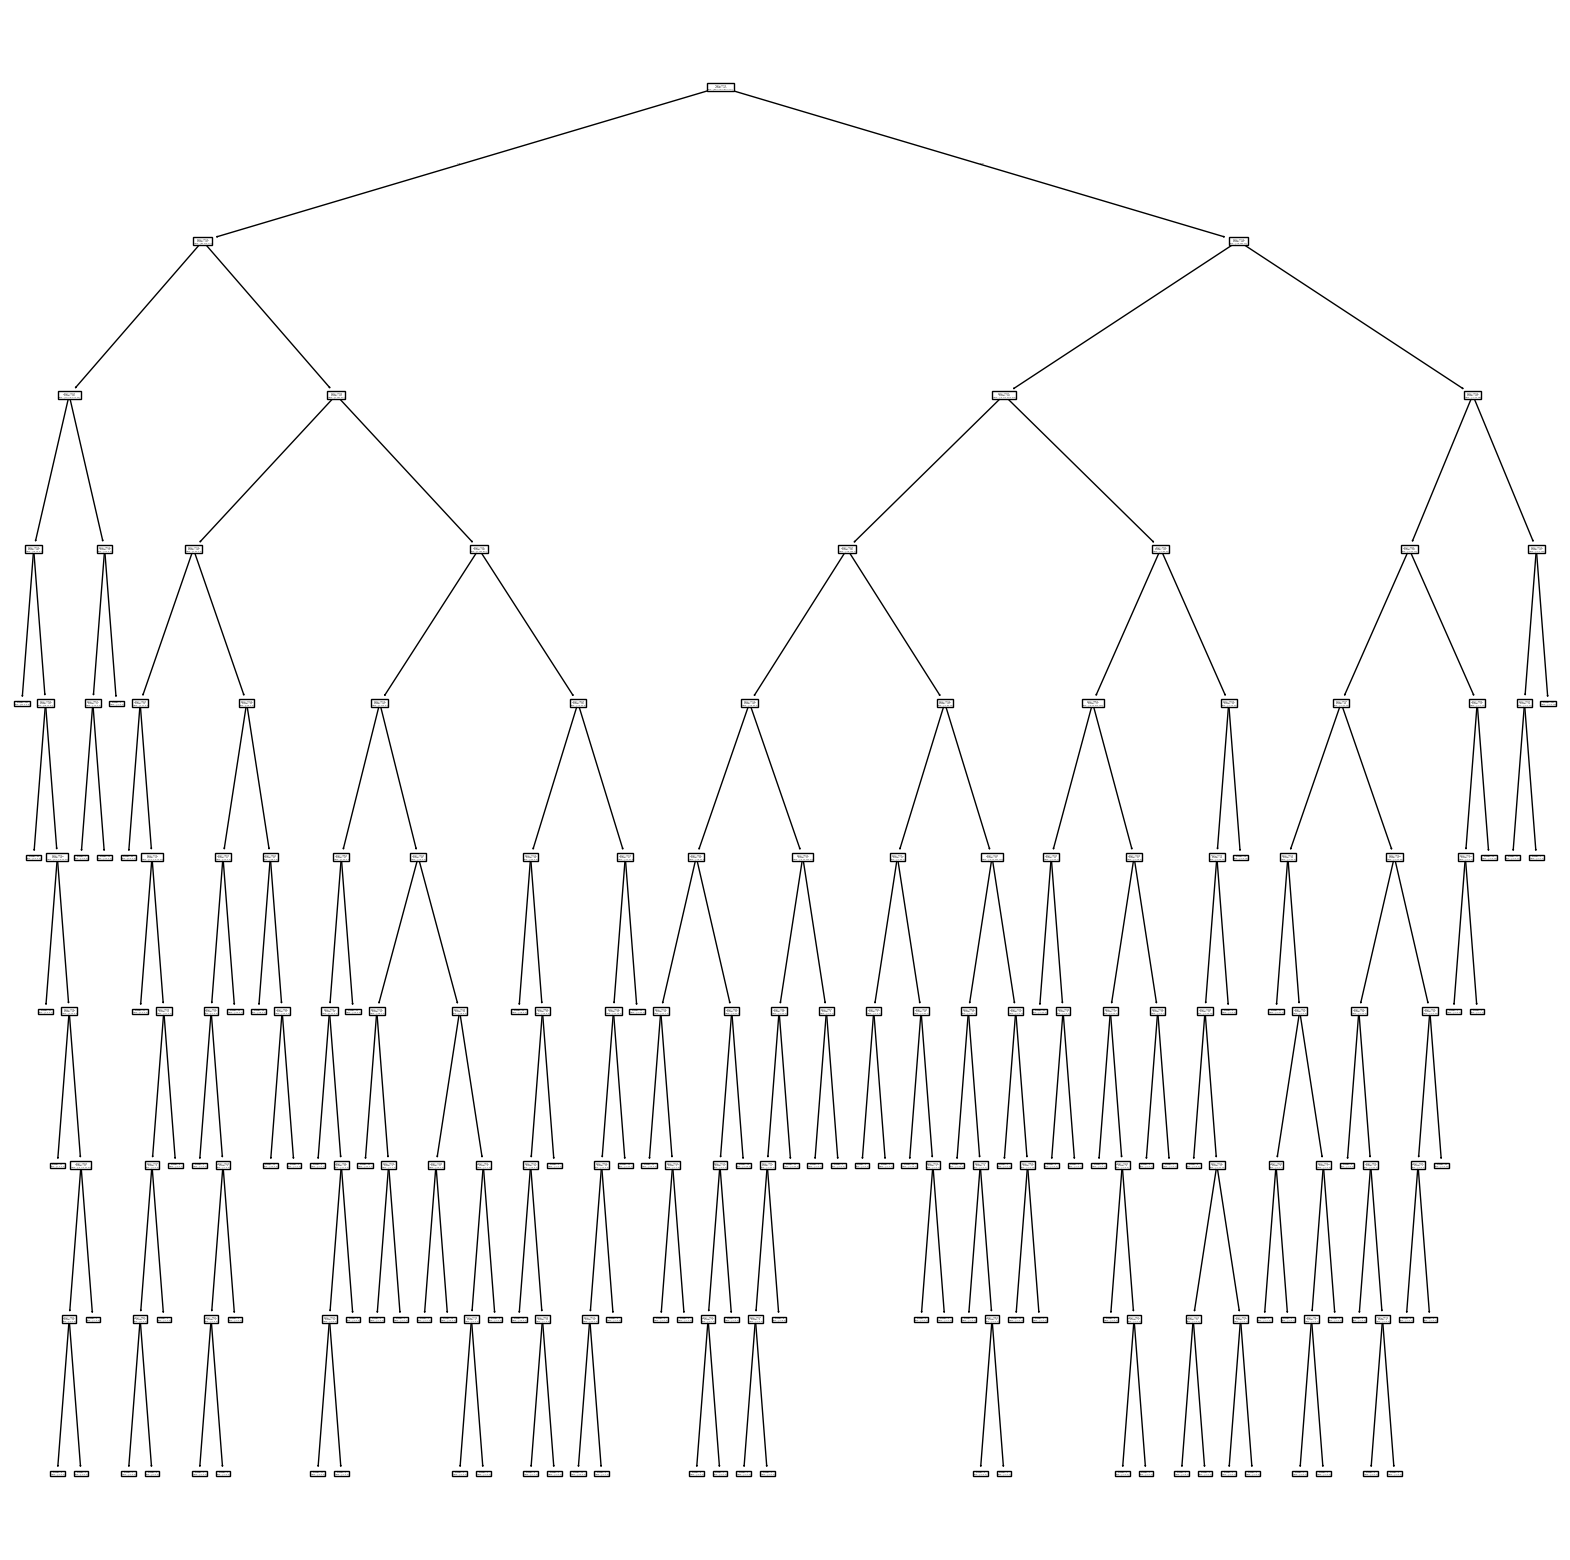

In [362]:
plt.figure(figsize=(20,20))
classes = ['0','1','2', '3']
plot_tree(model_pre_p)
plt.show()

**Post - pruning** 

El siguiente código está utilizando la técnica de "post-pruning" (poda posterior) para árboles de decisión . Lo anterior, con el objetivo de evitar el sobreajuste (overfitting) del modelo, permitiendo que el árbol sea más generalizable a nuevos datos. Para lo anterior usamos la función `decisiontree.cost_complexity_pruning_path()`, a tráves de la cual se calcula el camino de poda basado en la complejidad del costo del árbol de decisión. El método devuelve un objeto que contiene los valores de `ccp_alphas` y las impurezas correspondientes para cada nivel de poda. La poda basada en la complejidad del costo busca encontrar el mejor equilibrio entre la complejidad del modelo (número de nodos) y su rendimiento.

In [363]:
# post prunning
path = decisiontree_new.cost_complexity_pruning_path(x_train_tree_new, y_train_tree_new)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00142857 0.00142857 0.00142857 0.00152979 0.00167751
 0.00190476 0.00196778 0.00196778 0.00196778 0.00196778 0.00196778
 0.00196778 0.00196778 0.00214286 0.00214286 0.00218879 0.00231794
 0.00234783 0.00235742 0.00245637 0.00247792 0.00249302 0.00252572
 0.00255604 0.00257831 0.00257831 0.00260824 0.00264529 0.00285714
 0.00292708 0.00294497 0.00304372 0.0031089  0.00315074 0.00320073
 0.00321024 0.00321024 0.00323523 0.00345319 0.00346768 0.00347693
 0.00349463 0.00371232 0.00371646 0.0037407  0.00378363 0.00386747
 0.00391919 0.00407172 0.00424439 0.00427565 0.00443225 0.00463587
 0.00521638 0.00568231 0.0057286  0.00581149 0.00605313 0.00631182
 0.00657009 0.00764188 0.00770577 0.00779533 0.00782899 0.00787807
 0.00789175 0.00806964 0.00880388 0.00883974 0.00963374 0.00982248
 0.00991732 0.00999197 0.01000897 0.01005691 0.01017525 0.01062323
 0.01126282 0.01182636 0.01296767 0.01331295 0.01454855 0.01531783
 0.01571203 0.01776634 0.02006507 0.02141524 0.02738983 0.0296

A tráves del siguiente fragmento de código se entrena varios modelos de árboles de decisión con diferentes niveles de poda y se almacenan en un objeto de tipo lista `clfs`. 

In [364]:
clfs = [] # lista vacía llamada clfs que se utilizará para almacenar los modelos de árboles de decisión entrenados.
for ccp_alpha in ccp_alphas: # Itera sobre cada valor de ccp_alpha en la lista ccp_alphas. Cada valor representa un nivel de poda diferente que se aplicará al árbol de decisión.
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) #Crea una instancia con  valor actual de ccp_alpha para la poda. (random_state=0 asegura que el proceso de entrenamiento sea reproducible)
    clf.fit(x_train_tree_new, y_train_tree_new) #Entrena el modelo
    clfs.append(clf) #Agrega el modelo entrenado a la lista clfs.

A continuación, Eliminamos el último `modelo` almacenado en la lita `clfs`, con base al ultimo coeficiente de poda `ccp_alpha`. 

In [365]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

El siguiente gráfico muestra cómo varían el `número de nodos` y la `profundidad` máxima del árbol de decisión en función de los diferentes valores de `ccp_alpha`. También ilustra las tendencias en estas métricas a medida que se ajusta el valor de `ccp_alpha`.

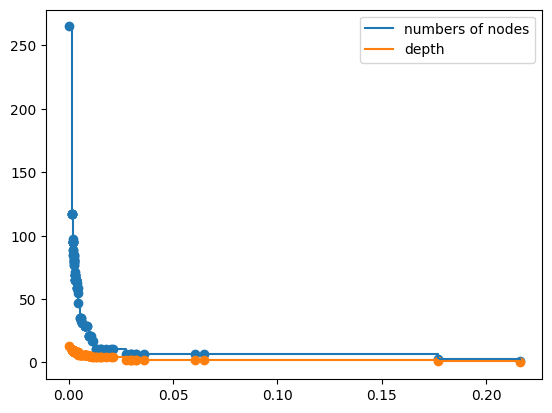

In [366]:
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='numbers of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Text(0, 0.5, 'total impurity of leaves')

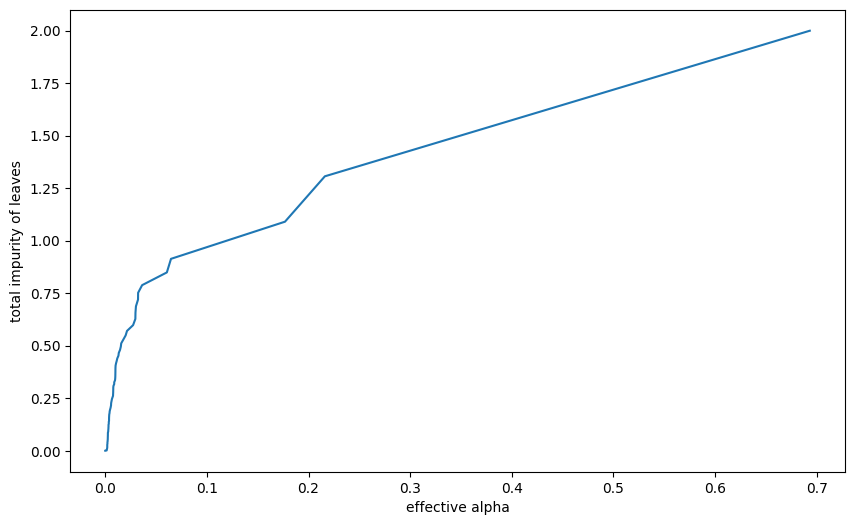

In [367]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [269]:
from sklearn.metrics import accuracy_score

# Lista para almacenar la precisión en los datos de entrenamiento y prueba
train_scores = []
test_scores = []

# Entrenar un modelo para cada valor de ccp_alpha y almacenar el rendimiento
for clf in clfs:
    y_train_pred_post = clf.predict(x_train_tree_new)
    y_test_pred_post = clf.predict(x_test_tree_new)
    
    train_scores.append(accuracy_score(y_train_tree_new, y_train_pred))
    test_scores.append(accuracy_score(y_test_tree_new, y_test_pred))

# Encontrar el índice del valor de ccp_alpha con la mayor precisión en el conjunto de prueba
best_index = test_scores.index(max(test_scores))
best_ccp_alpha = ccp_alphas[best_index]

print(f"Mejor ccp_alpha: {best_ccp_alpha}")



Mejor ccp_alpha: 0.0


In [371]:
# Entrenar el modelo con el mejor ccp_alpha
best_model_post_p = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
best_model_post_p.fit(x_train_tree_new, y_train_tree_new)

# 6. Realizar predicciones con el mejor modelo
y_pred_post_pruning = best_model_post_p.predict(x_test_tree_new)

# Mostrar las primeras predicciones para verificar
print(y_pred_post_pruning)

[3 3 1 1 1 3 2 2 2 3 1 2 3 1 2 2 1 3 0 2 0 1 2 0 0 1 2 3 3 0 0 2 2 3 3 2 3
 3 0 0 1 2 1 0 0 1 0 2 3 1 0 1 1 2 0 1 1 0 3 2 1 0 0 3 3 0 3 3 1 1 3 2 2 0
 1 3 0 3 0 3 2 3 0 0 1 0 1 2 3 2 1 3 3 2 2 0 0 2 3 2 3 0 0 3 2 3 0 0 2 1 1
 2 2 1 2 3 2 0 0 0 2 3 1 0 1 2 1 0 2 3 0 3 2 3 1 0 3 3 3 1 0 2 1 1 0 0 1 1
 2 0 3 2 3 3 1 0 3 1 0 1 3 1 1 1 3 1 0 1 3 1 2 3 3 2 2 1 2 3 3 1 2 3 3 3 3
 2 3 1 2 3 1 0 3 1 1 0 2 1 3 0 0 3 0 0 2 1 0 2 2 0 0 3 0 1 2 2 1 1 2 1 2 3
 1 2 2 1 2 3 0 1 3 0 0 2 0 2 3 3 1 1 2 1 0 0 2 2 3 1 2 2 1 0 1 0 0 2 1 2 3
 1 1 3 3 3 3 1 0 3 0 0 0 1 2 3 0 2 1 2 3 0 3 0 1 1 1 3 1 2 3 3 3 0 0 1 2 3
 2 0 0 0 2 1 0 2 2 2 0 0 3 2 0 3 1 1 0 0 2 0 2 0 3 3 1 2 1 2 3 3 0 0 1 2 0
 2 3 3 0 2 1 0 1 1 1 0 2 3 0 0 3 1 2 3 2 2 0 0 1 0 2 3 2 2 1 3 1 1 0 0 3 1
 3 0 3 3 2 1 2 2 0 2 3 1 3 1 1 2 0 1 2 2 3 0 0 0 1 1 0 1 3 2 2 3 3 0 0 3 2
 2 1 2 0 2 1 1 1 0 1 3 3 2 1 2 2 0 2 0 1 2 3 3 1 3 3 3 2 0 2 1 1 2 0 2 3 1
 3 0 1 1 2 2 3 0 2 2 3 1 3 1 3 0 0 0 3 1 1 2 2 2 2 3 1 0 2 2 0 0 2 1 3 1 3
 1 3 3 2 1 1 0 3 0 3 1 0 

In [373]:
y_train_pred_post_p = best_model_post_p.predict(x_train_tree_new) # Realiza predicciones de las etiquetas de entrenamiento utilizando el modelo entrenado
y_test_pred_post_p = best_model_post_p.predict(x_test_tree_new) # Realiza predicciones de las etiquetas en el conjunto de prueba (que no fue utilizado en el entrenamiento)

Train score 1.0
Confusion matrix


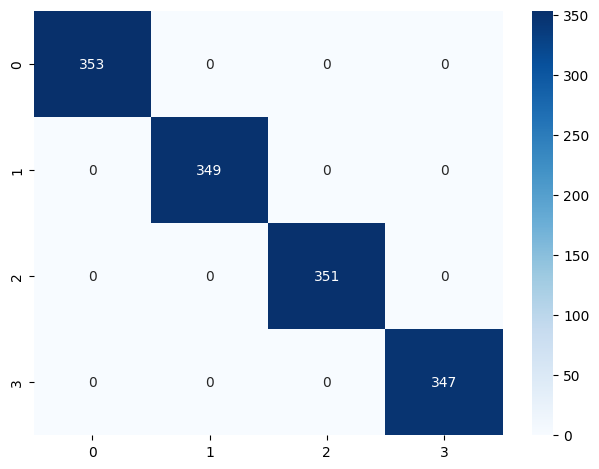

In [374]:
print(f'Train score {accuracy_score(y_train_pred_post_p,y_train_tree)}')
plot_confusionmatrix(y_train_pred_post_p,y_train_tree_new)

El modelo clasificó correctamente todas las observaciones en sus respectivas clases. Aunque el rendimiento en el conjunto de entrenamiento es perfecto, es importante tener precaución, ya que esto podría indicar que el modelo está sobreajustado a los datos de entrenamiento. Esto significa que el modelo podría no generalizar bien a nuevos datos no vistos, como los del conjunto de prueba.

Test score 0.86
Confusion matrix


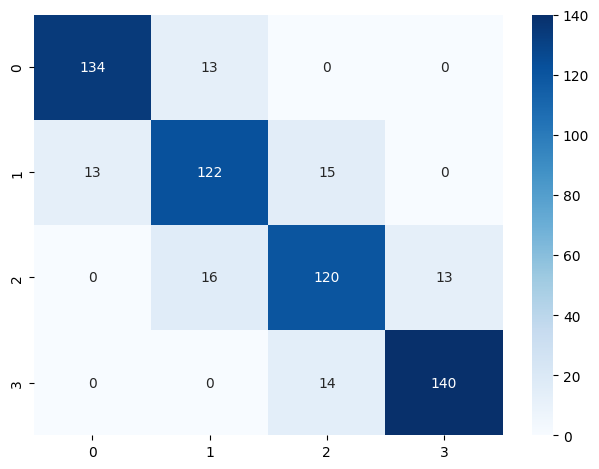

In [375]:
print(f'Test score {accuracy_score(y_test_pred_post_p,y_test_tree)}')
plot_confusionmatrix(y_test_pred_post_p,y_test_tree_new)

El modelo clasifico las observaciones como se describe a continuación: 

* Clase 0:
    * 134 observaciones pertenecientes a la clase 0 fueron correctamente clasificadas como tal.
    * 13 observaciones de la clase 0 fueron incorrectamente clasificadas como clase 1.

* Clase 1:
    * 122 observaciones de la clase 1 fueron correctamente clasificadas como tal.
    * 13 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 0.
    * 15 observaciones de la clase 1 fueron incorrectamente clasificadas como clase 2.

* Clase 2:
    * 120 observaciones de la clase 2 fueron correctamente clasificadas como tal.
    * 16 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 1.
    * 13 observaciones de la clase 2 fueron incorrectamente clasificadas como clase 3.

* Clase 3:
    * 140 observaciones pertenecientes a la clase 3 fueron correctamente clasificadas como tal.
    * 14 observaciones de la clase 3 fueron incorrectamente clasificadas como clase 2.

Con base a los resultados anteriores, se puede indicar que la técnica de post-pruning se considera mejor en este caso, ya que logra una precisión más alta en los datos de prueba y ofrece una mejor generalización sobre datos nuevos